In [1]:
import pandas
import datetime
import numpy
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from matplotlib.colors import Normalize
from matplotlib import ticker
from davitpy.models import *
from davitpy import utils
from aacgmv2 import convert_mlt
%matplotlib inline

/usr/local/lib/python2.7/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


In [2]:
potentialDF = pandas.read_csv( "../data/sapsPotentials.txt", sep=' ',\
                    header=None, names=[ "asy", "normMLT", "MLAT", "potential" ] )
potentialDF["asy"].unique()

array([ 60,  90, 180,  30])

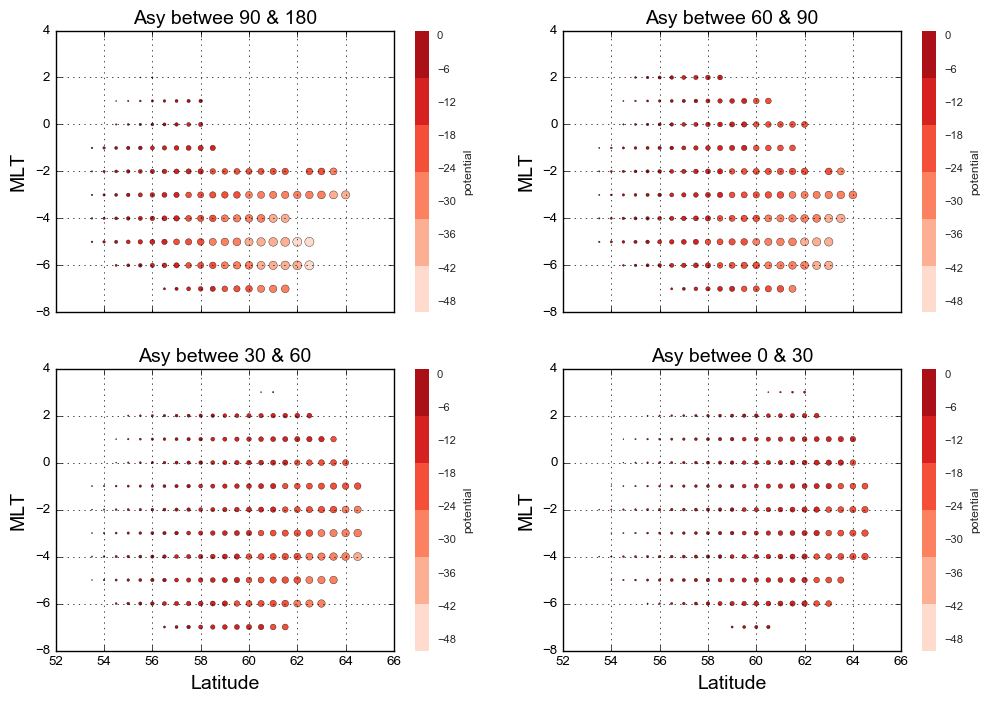

In [3]:
f = plt.figure(figsize=(12, 8))
ax1 = f.add_subplot(2,2,1)
ax2 = f.add_subplot(2,2,2)
ax3 = f.add_subplot(2,2,3)
ax4 = f.add_subplot(2,2,4)

sns.set_style("darkgrid")
sns.set_context("paper")
seaMap = ListedColormap(sns.color_palette("Reds"))
# 180
sns.set_style("darkgrid")
sns.set_context("paper")
seaMap = ListedColormap(sns.color_palette("Reds"))
# 180
potentialDF180 = potentialDF[ potentialDF["asy"] == 180 ]
potentialDF180.plot( kind='scatter',
              x='MLAT',
              y='normMLT',
              c='potential',
              s=potentialDF180["potential"]*-1, cmap=seaMap, vmin=-50, vmax=1, ax=ax1, sharex=True)
ax1.set_ylabel("MLT", fontsize=14)
# ax1.set_xlabel("Latitude", fontsize=14)
ax1.set_title( "Asy betwee 90 & 180", fontsize=14 )
# 90
potentialDF90 = potentialDF[ potentialDF["asy"] == 90 ]
potentialDF90.plot( kind='scatter',
              x='MLAT',
              y='normMLT',
              c='potential',
              s=potentialDF90["potential"]*-1, cmap=seaMap, vmin=-50, vmax=1, ax=ax2)
ax2.set_ylabel("MLT", fontsize=14)
ax2.set_xlabel("Latitude", fontsize=14)
ax2.set_title( "Asy betwee 60 & 90", fontsize=14 )
# 60
potentialDF60 = potentialDF[ potentialDF["asy"] == 60 ]
potentialDF60.plot( kind='scatter',
              x='MLAT',
              y='normMLT',
              c='potential',
              s=potentialDF60["potential"]*-1, cmap=seaMap, vmin=-50, vmax=1, ax=ax3)
ax3.set_ylabel("MLT", fontsize=14)
ax3.set_xlabel("Latitude", fontsize=14)
ax3.set_title( "Asy betwee 30 & 60", fontsize=14 )
# 30
potentialDF30 = potentialDF[ potentialDF["asy"] == 30 ]
potentialDF30.plot( kind='scatter',
              x='MLAT',
              y='normMLT',
              c='potential',
              s=potentialDF30["potential"]*-1, cmap=seaMap, vmin=-50, vmax=1, ax=ax4)
ax4.set_ylabel("MLT", fontsize=14)
ax4.set_xlabel("Latitude", fontsize=14)
ax4.set_title( "Asy betwee 0 & 30", fontsize=14 )

f.savefig("../figs/potPlots.pdf",bbox_inches='tight')

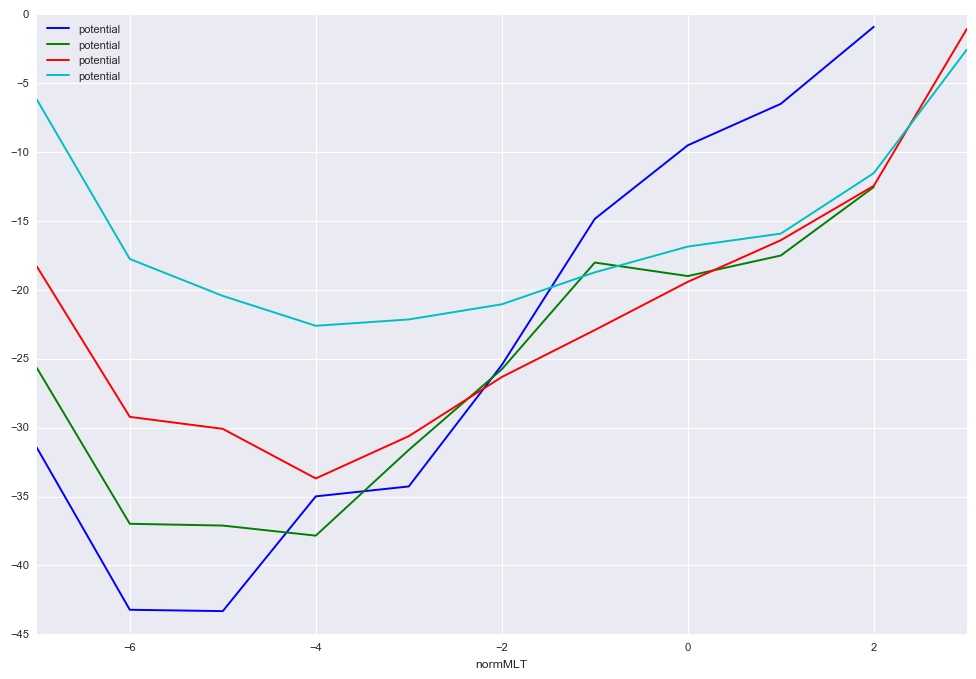

In [4]:
f = plt.figure(figsize=(12, 8))
ax1 = f.add_subplot(1,1,1)
pLat180 = potentialDF180.groupby("normMLT")["potential"].min().reset_index()
pLat180.plot( x="normMLT", y="potential", ax=ax1 )
pLat90 = potentialDF90.groupby("normMLT")["potential"].min().reset_index()
pLat90.plot( x="normMLT", y="potential", ax=ax1 )
pLat60 = potentialDF60.groupby("normMLT")["potential"].min().reset_index()
pLat60.plot( x="normMLT", y="potential", ax=ax1 )
pLat30 = potentialDF30.groupby("normMLT")["potential"].min().reset_index()
pLat30.plot( x="normMLT", y="potential", ax=ax1 )

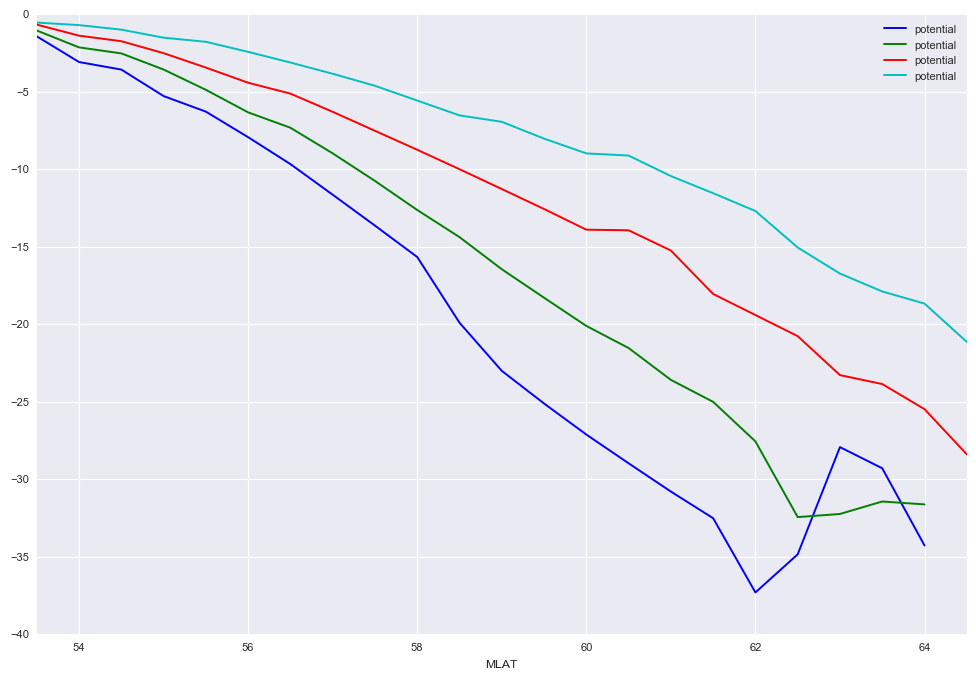

In [5]:
f = plt.figure(figsize=(12, 8))
ax1 = f.add_subplot(1,1,1)
pLat180 = potentialDF180.groupby("MLAT")["potential"].mean().reset_index()
pLat180.plot( x="MLAT", y="potential", ax=ax1 )
pLat90 = potentialDF90.groupby("MLAT")["potential"].mean().reset_index()
pLat90.plot( x="MLAT", y="potential", ax=ax1 )
pLat60 = potentialDF60.groupby("MLAT")["potential"].mean().reset_index()
pLat60.plot( x="MLAT", y="potential", ax=ax1 )
pLat30 = potentialDF30.groupby("MLAT")["potential"].mean().reset_index()
pLat30.plot( x="MLAT", y="potential", ax=ax1 )

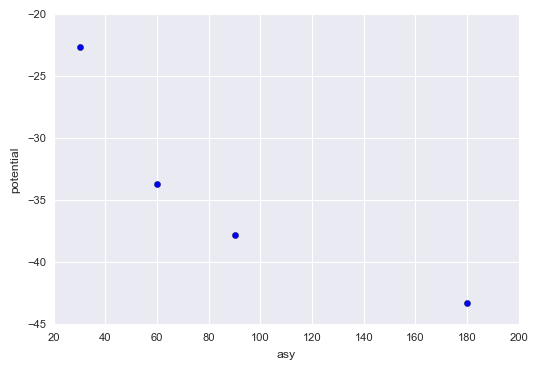

In [6]:
peakDF = potentialDF.groupby( ["asy"] ).min().reset_index()
peakDF.plot( x="asy", y="potential", kind="scatter" )